In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [2]:
# get data ready
# build model with a training loop and optimizer
# make a prediction with the model
# evaluate the model
# improve the model
# save the model

In [3]:
# get data ready
df = pd.read_csv("06-study_hours_grades.csv")

In [4]:
df.head()

,study_hours,grade
0,3.745401,30.203939
1,9.507143,57.878452
2,7.319939,46.368401
3,5.986585,39.330717
4,1.560186,14.843888


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   study_hours  50 non-null     float64
 1   grade        50 non-null     float64
dtypes: float64(2)
memory usage: 932.0 bytes


In [6]:
df.describe()

,study_hours,grade
count,50.000000,50.000000
mean,4.459239,32.290305
std,2.888832,14.431931
min,0.205845,11.032281
25%,1.837670,21.062901
50%,4.360488,31.231858
75%,6.498549,41.683170
max,9.699099,60.573564


In [7]:
df['study_hours'].values # this is actually a numpy array, so we can convert this easily into tensors

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
       6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
       7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
       6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
       8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
       1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
       6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456])

In [8]:
torch.tensor(df['study_hours'].values)

tensor([3.7454, 9.5071, 7.3199, 5.9866, 1.5602, 1.5599, 0.5808, 8.6618, 6.0112,
        7.0807, 0.2058, 9.6991, 8.3244, 2.1234, 1.8182, 1.8340, 3.0424, 5.2476,
        4.3195, 2.9123, 6.1185, 1.3949, 2.9214, 3.6636, 4.5607, 7.8518, 1.9967,
        5.1423, 5.9241, 0.4645, 6.0754, 1.7052, 0.6505, 9.4889, 9.6563, 8.0840,
        3.0461, 0.9767, 6.8423, 4.4015, 1.2204, 4.9518, 0.3439, 9.0932, 2.5878,
        6.6252, 3.1171, 5.2007, 5.4671, 1.8485], dtype=torch.float64)

In [9]:
X = torch.tensor(df['study_hours'].values)
y = torch.tensor(df['grade'].values)

In [10]:
X

tensor([3.7454, 9.5071, 7.3199, 5.9866, 1.5602, 1.5599, 0.5808, 8.6618, 6.0112,
        7.0807, 0.2058, 9.6991, 8.3244, 2.1234, 1.8182, 1.8340, 3.0424, 5.2476,
        4.3195, 2.9123, 6.1185, 1.3949, 2.9214, 3.6636, 4.5607, 7.8518, 1.9967,
        5.1423, 5.9241, 0.4645, 6.0754, 1.7052, 0.6505, 9.4889, 9.6563, 8.0840,
        3.0461, 0.9767, 6.8423, 4.4015, 1.2204, 4.9518, 0.3439, 9.0932, 2.5878,
        6.6252, 3.1171, 5.2007, 5.4671, 1.8485], dtype=torch.float64)

In [11]:
y

tensor([30.2039, 57.8785, 46.3684, 39.3307, 14.8439, 16.3600, 11.9829, 55.4231,
        40.7430, 41.8775, 11.6774, 57.7253, 50.2683, 21.8403, 21.1532, 21.0328,
        23.5337, 35.6194, 32.2598, 26.5125, 39.6343, 16.6034, 22.3946, 25.9257,
        34.4286, 51.9713, 19.8397, 37.7188, 40.3440, 11.0323, 41.1000, 21.6023,
        13.1809, 60.5736, 53.0421, 52.0637, 25.4048, 14.2856, 44.3952, 28.0325,
        15.6626, 35.4731, 14.6752, 54.4295, 21.3220, 42.1226, 27.4164, 36.6609,
        36.2760, 20.2693], dtype=torch.float64)

In [12]:
# let's to do a train-test split manually without sklearn

In [13]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [14]:
X_train

tensor([3.7454, 9.5071, 7.3199, 5.9866, 1.5602, 1.5599, 0.5808, 8.6618, 6.0112,
        7.0807, 0.2058, 9.6991, 8.3244, 2.1234, 1.8182, 1.8340, 3.0424, 5.2476,
        4.3195, 2.9123, 6.1185, 1.3949, 2.9214, 3.6636, 4.5607, 7.8518, 1.9967,
        5.1423, 5.9241, 0.4645, 6.0754, 1.7052, 0.6505, 9.4889, 9.6563, 8.0840,
        3.0461, 0.9767, 6.8423, 4.4015], dtype=torch.float64)

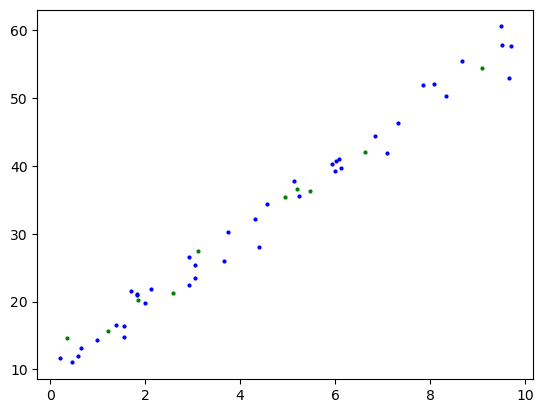

In [15]:
plt.scatter(X_train, y_train, c="b", s=4, label="Training data")
plt.scatter(X_test, y_test, c="g", s=4, label="Testing data")
plt.show()

In [16]:
# data is ready, now let's get to the second step
# but let's start with a very simple model without any training and see what it does

In [17]:
from torch import nn

class SimpleLinearRegressionModel(nn.Module): # inheriting neural network module
    def __init__(self):
        super().__init__() 
        # we will use linear model rather than writing the linear regression formula ourselves later on
        # and see how we can implement activation functions and so on. but now we just want to see how nn optimizes and learns
        self.weights = nn.Parameter(torch.randn(1, # <- initializing with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), 
                                   requires_grad=True) # <- this value will be updated with gradient descent as model learns)

        self.bias = nn.Parameter(torch.randn(1, # <- initializing with random bias 
                                            dtype=torch.float), # 
                                requires_grad=True) 

    # we should implement forward function 
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data, we will make this function more elegant later on
        return self.weights * x + self.bias # linear regression formula (y = m*x + b), obviously we will make this more elegant as well

In [18]:
torch.manual_seed(42)

model_0 = SimpleLinearRegressionModel()
model_0 = torch.compile(model_0)

In [19]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [20]:
model_0.state_dict()

OrderedDict([('_orig_mod.weights', tensor([0.3367])),
             ('_orig_mod.bias', tensor([0.1288]))])

In [21]:
# this is the random initiailization of weights and biases

In [22]:
# let's make some predictions and see what happens (i know we haven't trained it yet, let's just see)
with torch.inference_mode(): # turns off gradient tracking, it is not training
    y_preds = model_0(X_test)

In [23]:
len(X_test), len(y_preds)

(10, 10)

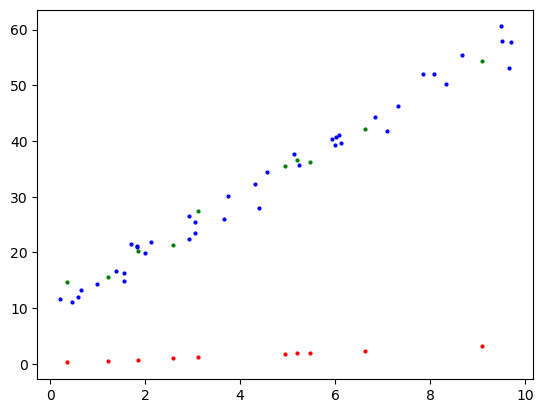

In [24]:
plt.scatter(X_train, y_train, c="b", s=4, label="Training data")
plt.scatter(X_test, y_test, c="g", s=4, label="Testing data")
plt.scatter(X_test, y_preds, c="r", s=4, label="Predictions")
plt.show()

In [25]:
# as you can see our prediction is not good at all! because we haven't trained the nn yet

In [26]:
# let's actually start with training

In [27]:
# before creating the training loop we have to define the optimizer and loss function

In [28]:
loss_fn = nn.MSELoss() # MSE
#loss_fn = nn.L1Loss() #-> MAE

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.001) # learning rate 

# we're going to work with adam later on obviously 

In [29]:
torch.manual_seed(42)

# Set the number of epochs 
epochs = 120
train_loss_values = []
test_loss_values = []
epoch_count = []


for epoch in range(epochs):

    ### Training loop (we are going to make that into a function later on)
    # model in training mode (default mode of a model)
    model_0.train()

    # 1. Forward propogation with train data using the forward() method  
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. (optimizer gradient numbers accumulate every epoch, we need to reset it)
    optimizer.zero_grad()

    # 4. back propogation
    loss.backward()

    # 5. optimize the weights 
    optimizer.step()

    ### Testing (we can do that outside of the training loop) 

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. make predictions
      test_pred = model_0(X_test)

      # 2. loss calculation for predictions
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype

      # i am going to print out every 5 epoch, obviously you can change that 
      if epoch % 5 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} |  Train Loss: {loss} | Test Loss: {test_loss} ")

Epoch: 0 |  Train Loss: 1156.0767463081781 | Test Loss: 858.3089002392693 
Epoch: 5 |  Train Loss: 633.9334744710083 | Test Loss: 484.2838126795197 
Epoch: 10 |  Train Loss: 352.99125276114285 | Test Loss: 280.9052321188652 
Epoch: 15 |  Train Loss: 201.80191856738534 | Test Loss: 169.8918962041271 
Epoch: 20 |  Train Loss: 120.41268871324436 | Test Loss: 108.98032469406681 
Epoch: 25 |  Train Loss: 76.57232180621143 | Test Loss: 75.32371818092619 
Epoch: 30 |  Train Loss: 52.9314284286948 | Test Loss: 56.550341340290345 
Epoch: 35 |  Train Loss: 40.157054153236494 | Test Loss: 45.94531686432932 
Epoch: 40 |  Train Loss: 33.2285363195233 | Test Loss: 39.8529199979822 
Epoch: 45 |  Train Loss: 29.445092396910468 | Test Loss: 36.27478591424397 
Epoch: 50 |  Train Loss: 27.353849871049174 | Test Loss: 34.11266110941638 
Epoch: 55 |  Train Loss: 26.173215583708338 | Test Loss: 32.75872389060953 
Epoch: 60 |  Train Loss: 25.482771128378353 | Test Loss: 31.873639956137765 
Epoch: 65 |  Train

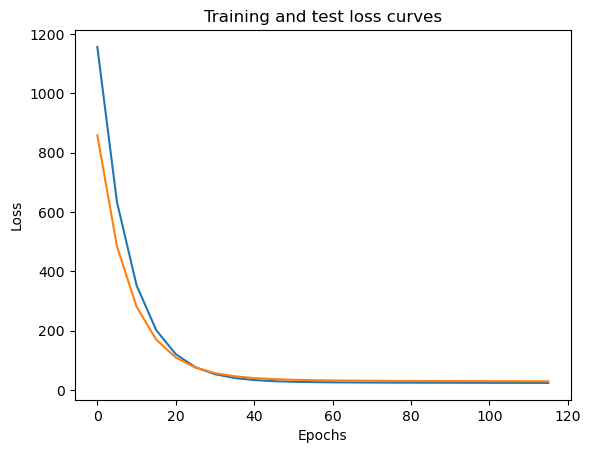

In [30]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

In [31]:
# what did this model come up with?

In [32]:
print(model_0.state_dict())

OrderedDict({'_orig_mod.weights': tensor([6.2983]), '_orig_mod.bias': tensor([1.6607])})


In [33]:
# let's actually make a prediction one more time with the trained model

In [34]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

In [35]:
y_preds

tensor([ 9.3471, 32.8485,  3.8266, 58.9326, 17.9595, 43.3885, 21.2933, 34.4162,
        36.0943, 13.3034], dtype=torch.float64)

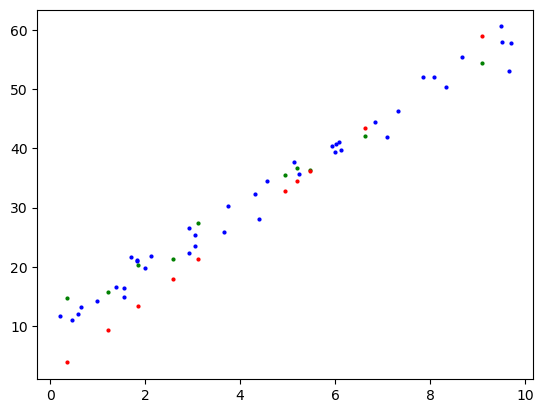

In [36]:
plt.scatter(X_train, y_train, c="b", s=4, label="Training data")
plt.scatter(X_test, y_test, c="g", s=4, label="Testing data")
plt.scatter(X_test, y_preds, c="r", s=4, label="Predictions")
plt.show()

In [37]:
# obviously we should make this much more elegant code-wise but it's a start to understand how nn works